### Bitcoin Price Predictions using FB Prophet

Article: [Apple Stock and Bitcoin Price Predictions Using FB’s Prophet - For Beginners - Python](https://towardsdatascience.com/apple-stock-and-bitcoin-price-predictions-using-fbs-prophet-for-beginners-python-96d5ec404b77)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

from fbprophet import Prophet

#### Download data

In [3]:
# Read API key from file
with open('alphavantage.txt') as f:
    key = f.read()

In [4]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies
cc = CryptoCurrencies(key=key, output_format='pandas')

In [5]:
btc, meta_Data = cc.get_digital_currency_daily(symbol='BTC', market='CNY')

In [6]:
btc.head()

,1a. open (CNY),1b. open (USD),2a. high (CNY),2b. high (USD),3a. low (CNY),3b. low (USD),4a. close (CNY),4b. close (USD),5. volume,6. market cap (USD)
date,,,,,,,,,,
2017-08-17,30187.045876,4261.48,31773.157143,4485.39,29756.781938,4200.74,30354.221196,4285.08,795.150377,795.150377
2017-08-18,30354.221196,4285.08,30966.536224,4371.52,27901.065049,3938.77,29102.460569,4108.37,1199.888264,1199.888264
2017-08-19,29102.460569,4108.37,29643.088553,4184.69,27272.245000,3850.00,29326.376326,4139.98,381.309763,381.309763
2017-08-20,29191.786026,4120.98,29830.027396,4211.08,28565.870294,4032.62,28946.052473,4086.29,467.083022,467.083022
2017-08-21,28824.496181,4069.13,29182.152194,4119.62,27709.946823,3911.79,28448.139200,4016.00,691.743060,691.743060


We will only consider **open** and **close** prices in **USD** as well as **volume**.

In [7]:
btc.drop(['1a. open (CNY)', '2a. high (CNY)', '2b. high (USD)', '3a. low (CNY)', '3b. low (USD)', '4a. close (CNY)', '6. market cap (USD)'], axis=1, inplace=True)

In [8]:
btc = btc.rename(columns={'1b. open (USD)': 'open', '4b. close (USD)': 'close', '5. volume': 'volume'})

In [9]:
btc.head()

,open,close,volume
date,,,
2017-08-17,4261.48,4285.08,795.150377
2017-08-18,4285.08,4108.37,1199.888264
2017-08-19,4108.37,4139.98,381.309763
2017-08-20,4120.98,4086.29,467.083022
2017-08-21,4069.13,4016.00,691.743060


#### Visualize the data

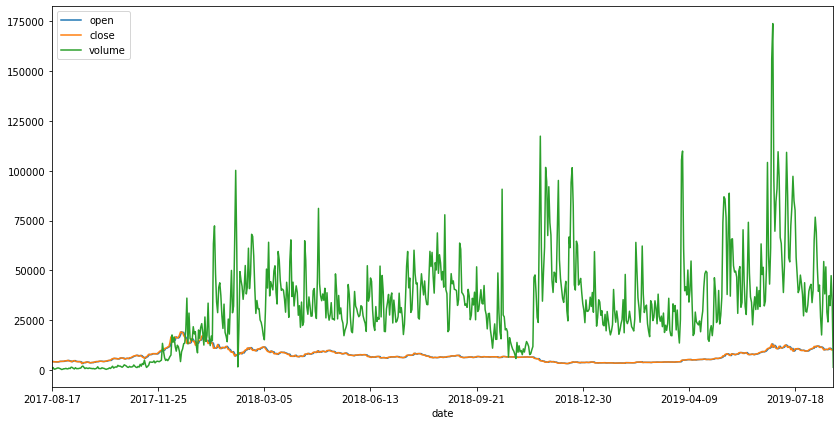

In [10]:
btc.plot(figsize=(14, 7));

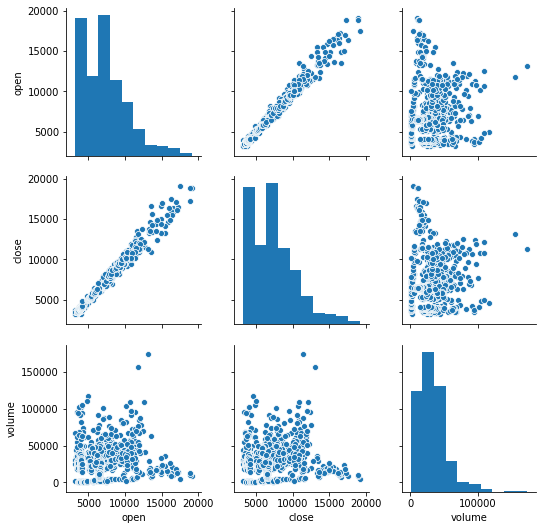

In [11]:
sns.pairplot(btc);

#### Data preprocessing

In [12]:
btc = btc.reset_index(level=['date'])

In [13]:
btc.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)

In [14]:
btc['ds'] = pd.to_datetime(btc['ds'])
btc['y'] = btc['y'].astype(float)

#### Fit the model

In [15]:
%%time
df_prophet = Prophet(changepoint_prior_scale=0.15, daily_seasonality=True)
df_prophet.fit(btc)

Wall time: 6.74 s


#### Make forecast

In [16]:
df_forecast = df_prophet.make_future_dataframe(periods=365, freq='D')

In [17]:
df_forecast.tail(10)

,ds
1092,2020-08-13
1093,2020-08-14
1094,2020-08-15
1095,2020-08-16
1096,2020-08-17
1097,2020-08-18
1098,2020-08-19
1099,2020-08-20
1100,2020-08-21
1101,2020-08-22


In [18]:
%%time
df_forecast = df_prophet.predict(df_forecast)

Wall time: 7.56 s


#### Visualize forecast

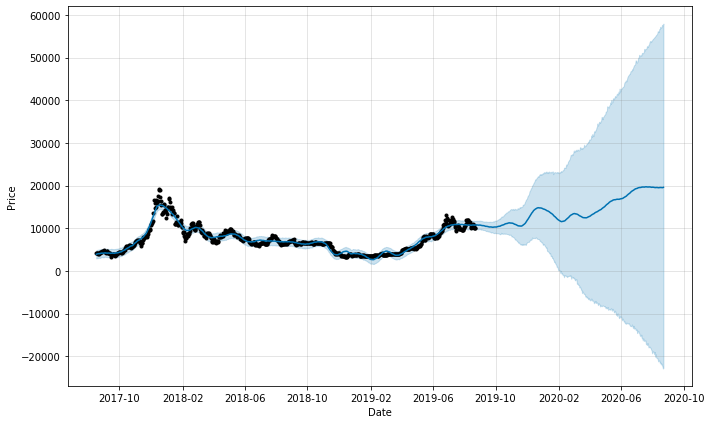

In [19]:
df_prophet.plot(df_forecast, xlabel='Date', ylabel='Price');

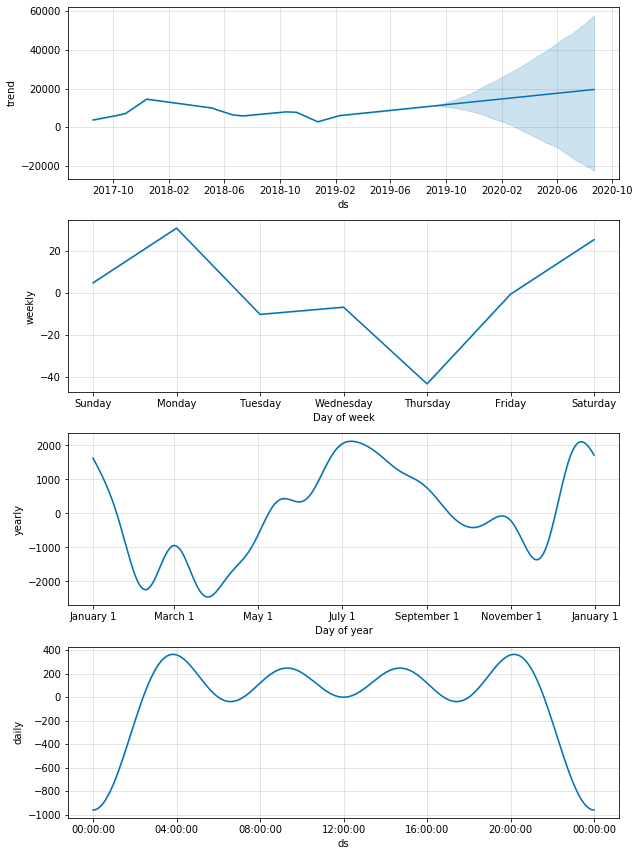

In [20]:
df_prophet.plot_components(df_forecast);